In [7]:
!pip install TA-lib
import talib as ta

In [9]:
import datetime as dt
import talib as ta
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
from math import floor
import matplotlib.pyplot as plt

In [10]:
start=dt.datetime(2020,1,1)
end=dt.datetime(2022,1,1)
data=pdr.DataReader("GOOG","yahoo",start,end)
rsi=ta.RSI(data['Close'])

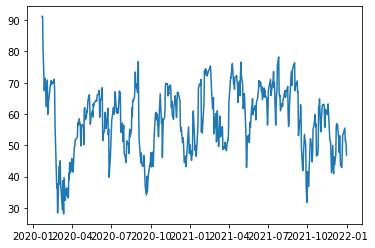

In [12]:
plt.plot(rsi)

In [73]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    ma_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i] <= 35:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        elif rsi[i] >= 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ma_signal.append(0)
            
    return buy_price, sell_price, ma_signal
            
buy_price, sell_price, ma_signal = implement_macd_strategy(rsi, data)

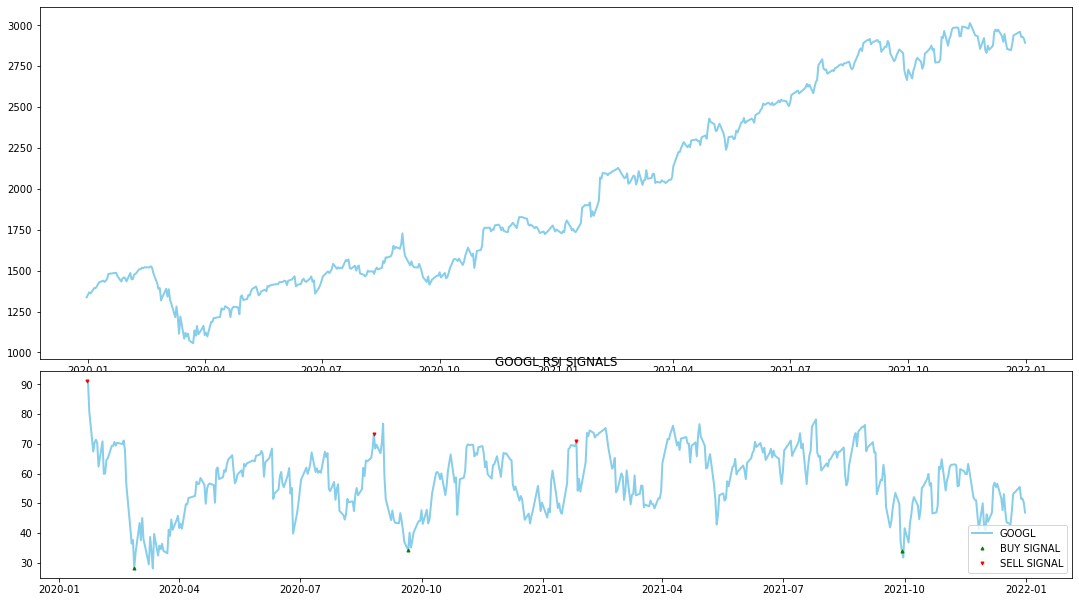

In [74]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)

ax1.plot(data['Close'], color = 'skyblue', linewidth = 2, label = 'GOOGL')
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 5, colspan = 1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
ax2.plot(rsi, color = 'skyblue', linewidth = 2, label = 'GOOGL')
ax2.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 3, label = 'BUY SIGNAL', linewidth = 0)
ax2.plot(data.index, sell_price, marker = 'v', color = 'r', markersize = 3, label = 'SELL SIGNAL', linewidth = 0)
ax2.legend()
ax2.set_title('GOOGL RSI SIGNALS')     
plt.legend(loc = 'lower right')
plt.show()


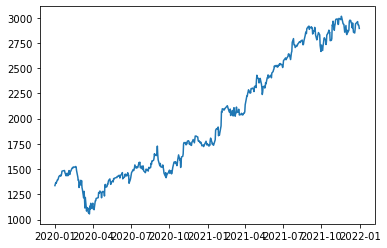

In [70]:

plt.plot(data['Close'])   


In [71]:
position = []
for i in range(len(ma_signal)):
    if ma_signal[i] != 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(data['Close'])):
    if ma_signal[i] == 1:
        position[i] = 1
    elif ma_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
MA50 = rsi
O_price = data['Open']
ma_signal = pd.DataFrame(ma_signal).rename(columns = {0:'ma_signal'}).set_index(data.index)
position = pd.DataFrame(position).rename(columns = {0:'ma_position'}).set_index(data.index)

frames = [O_price, MA50, ma_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Open,0,ma_signal,ma_position
Date,,,,
2019-12-31,1330.109985,NaN,0,0
2020-01-02,1341.550049,NaN,0,0
2020-01-03,1347.859985,NaN,0,0
2020-01-06,1350.000000,NaN,0,0
2020-01-07,1397.939941,NaN,0,0
...,...,...,...,...
2021-12-27,2949.270020,55.473002,0,1
2021-12-28,2967.489990,51.446597,0,1
2021-12-29,2928.590088,51.578943,0,1


In [72]:
data_ret = pd.DataFrame(np.diff(data['Close'])).rename(columns = {0:'returns'})
ma_strategy_ret = []

for i in range(len(data_ret)):
    try:
        returns = data_ret['returns'][i]*strategy['ma_position'][i]
        ma_strategy_ret.append(returns)
    except:
        pass
    
ma_strategy_ret_df = pd.DataFrame(ma_strategy_ret).rename(columns = {0:'ma_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/data['Close'][0])
ma_investment_ret = []

for i in range(len(ma_strategy_ret_df['ma_returns'])):
    returns = number_of_stocks*ma_strategy_ret_df['ma_returns'][i]
    ma_investment_ret.append(returns)

ma_investment_ret_df = pd.DataFrame(ma_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(ma_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print('Profit gained from the MA strategy by investing ${} in GOOGL : ${}'.format(investment_value,total_investment_ret))
print('Profit percentage of the MA strategy : {}%'.format(profit_percentage))

Profit gained from the MA strategy by investing $100000 in GOOGL : $65940.68
Profit percentage of the MA strategy : 65%
